In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/sulc/tfrecord-viewer.git

Cloning into 'tfrecord-viewer'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 4), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
!pip install pycocotools

In [2]:
!pip install -U pillow

Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (6.2.1)


In [4]:
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3376, done.
remote: Counting objects: 100% (3376/3376), done.
remote: Compressing objects: 100% (2867/2867), done.
remote: Total 3376 (delta 656), reused 2053 (delta 431), pack-reused 0
Receiving objects: 100% (3376/3376), 371.06 MiB | 34.27 MiB/s, done.
Resolving deltas: 100% (656/656), done.
Checking out files: 100% (3190/3190), done.


In [5]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1017523 sha256=eccf3a362bf02aeb13f45523aa0a61f3d9e2f8be1b83f8c52274487ac9aa161f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7zfe3ftq/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


In [6]:
%%bash
cd tfrecord-viewer/
python3 tfviewer.py '/content/drive/My Drive/CEO_Foundry_LLC/medical_train_images.record' --max-images 10

Process is terminated.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from object_detection.utils import visualization_utils as vu
from object_detection.protos import string_int_label_map_pb2 as pb
from object_detection.data_decoders.tf_example_decoder import TfExampleDecoder as TfDecoder
from google.protobuf import text_format

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
%matplotlib inline

In [0]:
def main(tfrecords_filename, label_map=None):
    if label_map is not None:
        label_map_proto = pb.StringIntLabelMap()
        with tf.gfile.GFile(label_map,'r') as f:
            text_format.Merge(f.read(), label_map_proto)
            class_dict = {}
            for entry in label_map_proto.item:
                class_dict[entry.id] = {'name':entry.display_name}
    sess = tf.Session()
    decoder = TfDecoder(label_map_proto_file=label_map, use_display_name=False)
    sess.run(tf.tables_initializer())
    max_display_images = 10
    idx = 0
    for record in tf.python_io.tf_record_iterator(tfrecords_filename):
        if idx<max_display_images:
          idx+=1
          example = decoder.decode(record)
          host_example = sess.run(example)
          #print ('achbogga_debug: ', host_example['groundtruth_boxes'], host_example)
          scores = np.ones(host_example['groundtruth_boxes'].shape[0])
          vu.visualize_boxes_and_labels_on_image_array( 
              host_example['image'],                                               
              host_example['groundtruth_boxes'],                                                     
              host_example['groundtruth_classes'],
              scores,
              class_dict,
              max_boxes_to_draw=None,
              use_normalized_coordinates=True)
          plt.imshow(host_example['image'])
          plt.show()

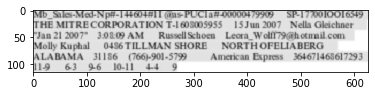

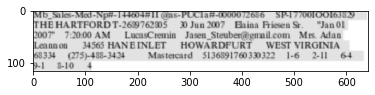

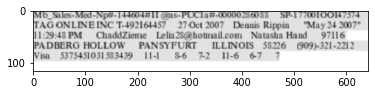

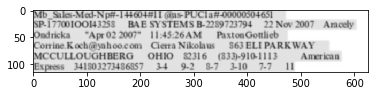

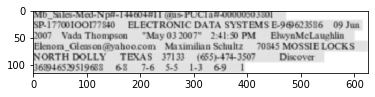

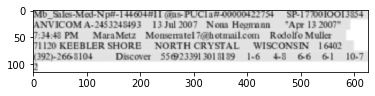

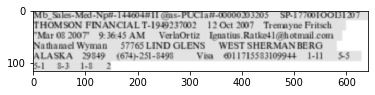

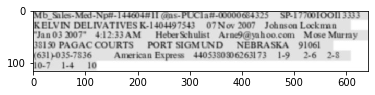

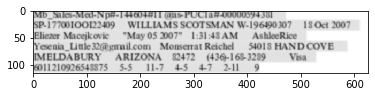

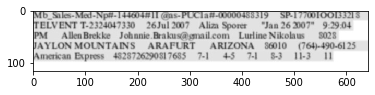

In [37]:
main('/content/drive/My Drive/CEO_Foundry_LLC/medical_train_images.record', label_map='/content/drive/My Drive/CEO_Foundry_LLC/medical_images_label_map.pbtxt')